In [1]:
from myImports import *

In [5]:
#Pass in point cloud data as np array
#implement a way to visualise distance via matching (choice of one arbitrary)
class PersisMod():
    def __init__(self, data, rval=None):
        self.data = data
        self.pd = self.calcpersis(self.data)
        self.mapping = rval
    def calcpersis(self,data):
        diag = ripser.ripser(data)["dgms"]
        df = pd.DataFrame()
        for i in range(len(diag)):
            temp = pd.DataFrame(diag[i],columns=["Birth","Death"])
            temp["HomologyG"] = i
            df = pd.concat([df,temp])
        return df
    
    def distance_to(self, target, metric):
        if metric == "bottleneck":
            source_df = self.pd[self.pd["Death"] != float("inf")]
            target_df = target.pd[target.pd["Death"] != float("inf")]
            res = persim.bottleneck(source_df[["Birth","Death"]].values, target_df[["Birth","Death"]].values)
        return res

    def showGs(self):
        fig, ax = plt.subplots(1, 2,figsize=(7.5, 4))
        fig.tight_layout(pad=5)
        #Scatter
        ax[0].set_title("Point Cloud")
        ax[0].set_xlabel("x")
        ax[0].set_ylabel("y")
        ax[0].scatter(self.data[:,0],self.data[:,1],s=10)
        #PD
        df = self.pd.copy(deep=True)
        infrep = list(df["Death"].nlargest(2))[1]*1.02
        df.replace(float("inf"), infrep, inplace=True)
        diagonal = np.linspace(0, infrep, 250)
        infline = np.linspace(0, infrep, 250)
        ax[1].plot(diagonal,diagonal, linestyle="dashed",color="black", zorder=1)
        ax[1].plot(infline,[infrep for i in infline], linestyle="dashed",color="black",zorder=1)
        ax[1].set_title("Persistence Diagram")
        ax[1].set_xlabel("Birth")
        ax[1].set_ylabel("Death")
        hom1 = ax[1].scatter(df[df["HomologyG"]==0].Birth,df[df["HomologyG"]==0].Death,color="#83aff0",s=10)
        hom1.set_label("H0")
        hom2 = ax[1].scatter(df[df["HomologyG"]==1].Birth,df[df["HomologyG"]==1].Death,color="#2c456b",s=10)
        hom2.set_label("H1")
        
        ax[1].legend([hom1,hom2],["H0", "H1"],loc='lower right')
        plt.show()

In [7]:
#For resetting matplotlib parameters --> latex errors
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

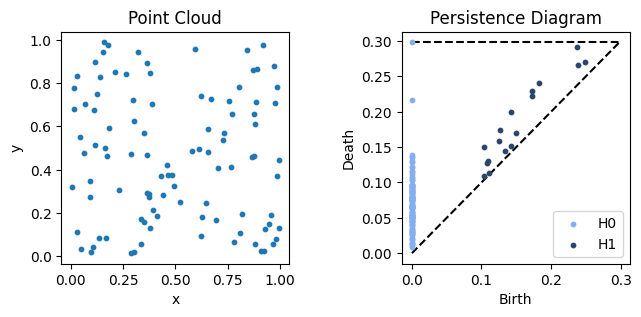

In [9]:
data = np.random.random((100,2))
test1 = PersisMod(data)
test1.showGs()

In [7]:
with open("point_clouds.json", "r") as f:
    json_data = json.load(f)
point_clouds = {float(key): np.array(value) for key, value in json_data.items()}

trainset = []
testset = []
for lam in point_clouds.keys():
    t = PersisMod(point_clouds[lam],lam)
    if len(testset)< 5:
        testset.append(t)
    else:
        trainset.append(t)

In [8]:
trainset

In [9]:
dist_matrix = [[0 for j in range(len(trainset))] for i in range(len(testset))]
#Compute Distance Matrix
for i in range(len(testset)):
    for j in range(i,len(trainset)):
        dist = testset[i].distance_to(trainset[j], "bottleneck")
        dist_matrix[i][j], dist_matrix[j][i] = dist, dist

In [10]:
#knn regression
predictions = []
for t in dist_matrix:
    s = sorted(t)
    summ = 0
    for i in range(0,3):
        loc = t.index(s[i])
        summ += trainset[loc].mapping
    predictions.append(summ/3)

real_l = []
errors = []
for i in range(len(testset)):
    diff = testset[i].mapping -  predictions[i]
    error = abs(diff)/testset[i].mapping
    real_l.append(testset[i].mapping)
    errors.append(error)

In [11]:
errors

[0.004150968391001985,
 0.665475633557043,
 0.26883798319223784,
 0.17339757843319212,
 0.005175391285429833]

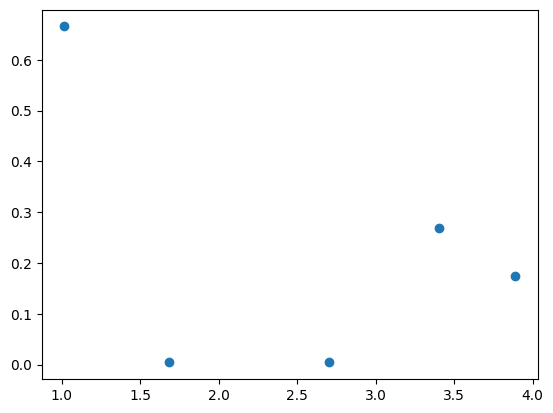

In [12]:
plt.scatter(real_l,errors)
plt.show()

In [4]:
print("here")
#test

here
